## Artificial Neural Network for Data set 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')

# Importing the dataset
newdf1=pd.read_csv(r'C:\Users\arush\weatheraus.csv') #please update the file location
newdf1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1/1/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48,ENE,...,13,1006.3,1004.4,2,5,26.6,33.4,No,0.0,No
1,1/2/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37,SSE,...,8,1012.9,1012.1,1,1,20.3,27.0,No,0.0,No
2,1/4/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46,NNE,...,22,1012.3,1009.2,1,6,28.7,34.9,No,0.0,No
3,1/5/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31,WNW,...,22,1012.7,1009.1,1,5,29.1,35.6,No,0.0,No
4,1/6/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35,NW,...,15,1010.7,1007.4,1,6,33.6,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,6/20/2017,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35,SE,...,32,1013.9,1010.5,0,1,24.5,32.3,No,0.0,No
56416,6/21/2017,Darwin,21.2,32.6,0.0,7.6,8.6,E,37,SE,...,28,1014.6,1011.2,7,0,24.8,32.0,No,0.0,No
56417,6/22/2017,Darwin,20.7,32.8,0.0,5.6,11.0,E,33,E,...,23,1015.3,1011.8,0,0,24.8,32.1,No,0.0,No
56418,6/23/2017,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26,SE,...,58,1014.9,1010.7,1,1,24.8,29.2,No,0.0,No


In [2]:
#checking for NA
newdf1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

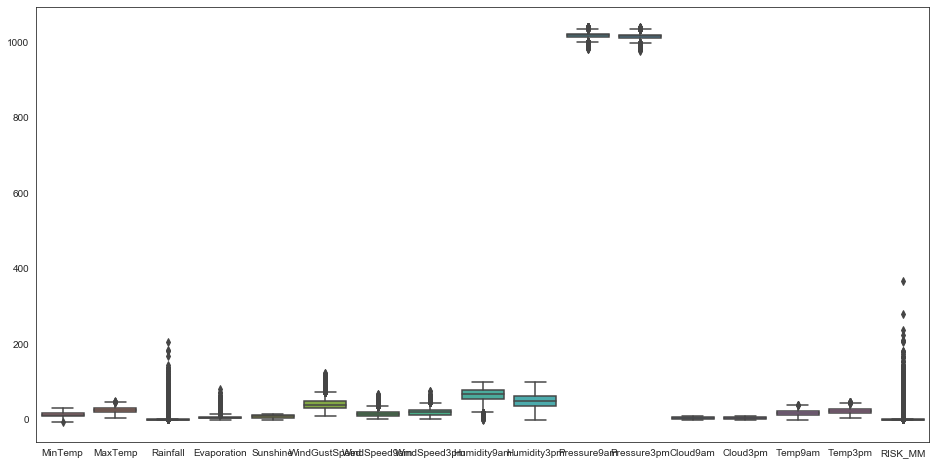

In [3]:

#finding outliers using boxplot
plt.figure(figsize=(16,8))
sns.boxplot(data = newdf1 )

In [4]:
#From the given dataset description, it is given that we should remove RISK_MM column, so it will be dropped as follow:
newdf1.drop(['RISK_MM'], axis=1, inplace=True)

In [5]:
#Exploring categorical values:
categorical = [var for var in newdf1.columns if newdf1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [6]:
#View categorical values:
newdf1[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,1/1/2009,Cobar,SSW,ENE,SW,No,No
1,1/2/2009,Cobar,S,SSE,SSE,No,No
2,1/4/2009,Cobar,NNE,NNE,NNW,No,No
3,1/5/2009,Cobar,WNW,WNW,WSW,No,No
4,1/6/2009,Cobar,WNW,NW,WNW,No,No


In [7]:
#Frequency count of categorical variables:
for var in categorical: 
    
    print(newdf1[var].value_counts())

11/19/2010    25
3/4/2009      25
3/8/2009      25
7/14/2010     25
2/11/2009     25
              ..
3/14/2008      1
1/13/2008      1
12/10/2007     1
5/4/2008       1
3/10/2008      1
Name: Date, Length: 3416, dtype: int64
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64
E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791

In [8]:
#check for cardinality 
for var in categorical:
    
    print(var, ' contains ', len(newdf1[var].unique()), ' labels')

Date  contains  3416  labels
Location  contains  26  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


In [9]:
#feature engineering of date variable

newdf1['Date'].dtypes

dtype('O')

In [10]:
# parse the dates, currently coded as strings, into datetime format

newdf1['Date'] = pd.to_datetime(newdf1['Date'])

In [11]:
# extract year from date

newdf1['Year'] = newdf1['Date'].dt.year

newdf1['Year'].head()

0    2009
1    2009
2    2009
3    2009
4    2009
Name: Year, dtype: int64

In [12]:
# extract month from date

newdf1['Month'] = newdf1['Date'].dt.month

newdf1['Month'].head()

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

In [13]:
# extract day from date

newdf1['Day'] = newdf1['Date'].dt.day

newdf1['Day'].head()

0    1
1    2
2    4
3    5
4    6
Name: Day, dtype: int64

In [14]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 26 columns):
Date             56420 non-null datetime64[ns]
Location         56420 non-null object
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null int64
WindDir9am       56420 non-null object
WindDir3pm       56420 non-null object
WindSpeed9am     56420 non-null int64
WindSpeed3pm     56420 non-null int64
Humidity9am      56420 non-null int64
Humidity3pm      56420 non-null int64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null int64
Cloud3pm         56420 non-null int64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RainTomorrow     56420 

In [16]:
 #drop the original Date variable

newdf1.drop('Date', axis=1, inplace = True)

KeyError: "['Date'] not found in axis"

In [17]:
#exploring other categorical variables one by one:

categorical = [var for var in newdf1.columns if newdf1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method
newdf2=pd.get_dummies(newdf1)

In [19]:
#Dropping extra dummy variables:
newdf2=newdf2.drop(['Location_AliceSprings','WindGustDir_E','WindDir9am_E','WindDir3pm_E','RainToday_No','RainTomorrow_No'], axis=1)

In [20]:
newdf2.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.00000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,...,0.072829,0.073609,0.059057,0.061769,0.07111,0.069514,0.056717,0.068345,0.220879,0.220259
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,...,0.259858,0.261135,0.235734,0.240737,0.25701,0.254329,0.231304,0.252338,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 91 columns):
MinTemp                      56420 non-null float64
MaxTemp                      56420 non-null float64
Rainfall                     56420 non-null float64
Evaporation                  56420 non-null float64
Sunshine                     56420 non-null float64
WindGustSpeed                56420 non-null int64
WindSpeed9am                 56420 non-null int64
WindSpeed3pm                 56420 non-null int64
Humidity9am                  56420 non-null int64
Humidity3pm                  56420 non-null int64
Pressure9am                  56420 non-null float64
Pressure3pm                  56420 non-null float64
Cloud9am                     56420 non-null int64
Cloud3pm                     56420 non-null int64
Temp9am                      56420 non-null float64
Temp3pm                      56420 non-null float64
Year                         56420 non-null int64
Month                  

In [22]:
x2 = newdf2.iloc[:,1:90].values 

y2 = newdf2.iloc[:,90].values

In [23]:
#splitting the data into test set and training set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x2, y2 , test_size = 0.3, random_state = 0)

In [24]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

## First Neural Net

In [26]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [71]:
# Part 2 - Now let's make the ANN!




# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 27645 samples, validate on 11849 samples
Epoch 1/200
27645/27645 [==============================] - 13s 484us/step - loss: 0.3858 - accuracy: 0.8159 - val_loss: 0.3551 - val_accuracy: 0.8514
Epoch 2/200
27645/27645 [==============================] - 14s 517us/step - loss: 0.3419 - accuracy: 0.8533 - val_loss: 0.3444 - val_accuracy: 0.8542
Epoch 3/200
27645/27645 [==============================] - 13s 476us/step - loss: 0.3304 - accuracy: 0.8592 - val_loss: 0.3395 - val_accuracy: 0.8523
Epoch 4/200
27645/27645 [==============================] - 13s 484us/step - loss: 0.3248 - accuracy: 0.8604 - val_loss: 0.3407 - val_accuracy: 0.8557
Epoch 5/200
27645/27645 [==============================] - 12s 423us/step - loss: 0.3209 - accuracy: 0.8630 - val_loss: 0.3332 - val_accuracy: 0.8575
Epoch 6/200
27645/27645 [==============================] - 14s 497us/step - loss: 0.3180 - accuracy: 0.8612 - val_loss: 0.3320 - val_accuracy: 0.8584
Epoch 7/200
27645/27645 [=========================

Epoch 55/200
27645/27645 [==============================] - 12s 426us/step - loss: 0.3001 - accuracy: 0.8693 - val_loss: 0.3282 - val_accuracy: 0.8554
Epoch 56/200
27645/27645 [==============================] - 14s 492us/step - loss: 0.2997 - accuracy: 0.8684 - val_loss: 0.3285 - val_accuracy: 0.8603
Epoch 57/200
27645/27645 [==============================] - 12s 437us/step - loss: 0.2998 - accuracy: 0.8683 - val_loss: 0.3288 - val_accuracy: 0.8577
Epoch 58/200
27645/27645 [==============================] - 14s 519us/step - loss: 0.2998 - accuracy: 0.8698 - val_loss: 0.3298 - val_accuracy: 0.8587
Epoch 59/200
27645/27645 [==============================] - 13s 453us/step - loss: 0.2996 - accuracy: 0.8689 - val_loss: 0.3274 - val_accuracy: 0.8580
Epoch 60/200
27645/27645 [==============================] - 14s 501us/step - loss: 0.2995 - accuracy: 0.8700 - val_loss: 0.3292 - val_accuracy: 0.8582
Epoch 61/200
27645/27645 [==============================] - 13s 460us/step - loss: 0.2997 - ac

27645/27645 [==============================] - 5s 176us/step - loss: 0.2963 - accuracy: 0.8702 - val_loss: 0.3321 - val_accuracy: 0.8545
Epoch 164/200
27645/27645 [==============================] - 5s 175us/step - loss: 0.2962 - accuracy: 0.8709 - val_loss: 0.3299 - val_accuracy: 0.8569
Epoch 165/200
27645/27645 [==============================] - 5s 190us/step - loss: 0.2966 - accuracy: 0.8702 - val_loss: 0.3303 - val_accuracy: 0.8569
Epoch 166/200
27645/27645 [==============================] - 5s 170us/step - loss: 0.2966 - accuracy: 0.8705 - val_loss: 0.3314 - val_accuracy: 0.8575
Epoch 167/200
27645/27645 [==============================] - 5s 171us/step - loss: 0.2963 - accuracy: 0.8706 - val_loss: 0.3297 - val_accuracy: 0.8569
Epoch 168/200
27645/27645 [==============================] - 5s 177us/step - loss: 0.2964 - accuracy: 0.8713 - val_loss: 0.3296 - val_accuracy: 0.8580
Epoch 169/200
27645/27645 [==============================] - 5s 174us/step - loss: 0.2964 - accuracy: 0.8715

In [73]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X1_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred)
accu=accuracy_score(y1_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[12154  1004]
 [ 1424  2344]] 

The accuracy is 0.8565520501004372


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


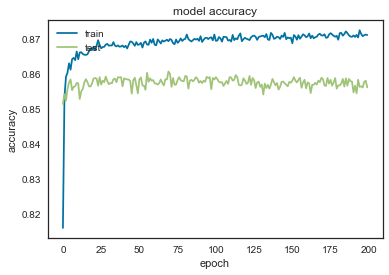

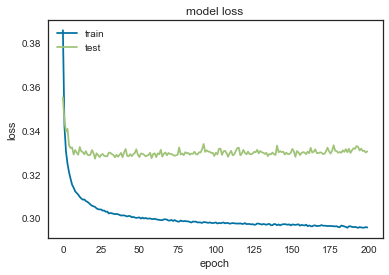

In [74]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
#100


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 100,validation_split=0.3)

Train on 27645 samples, validate on 11849 samples
Epoch 1/100
27645/27645 [==============================] - 6s 216us/step - loss: 0.3804 - accuracy: 0.8207 - val_loss: 0.3533 - val_accuracy: 0.8553
Epoch 2/100
27645/27645 [==============================] - 5s 198us/step - loss: 0.3388 - accuracy: 0.8555 - val_loss: 0.3433 - val_accuracy: 0.8537
Epoch 3/100
27645/27645 [==============================] - 5s 192us/step - loss: 0.3291 - accuracy: 0.8580 - val_loss: 0.3371 - val_accuracy: 0.8552
Epoch 4/100
27645/27645 [==============================] - 6s 199us/step - loss: 0.3239 - accuracy: 0.8586 - val_loss: 0.3373 - val_accuracy: 0.8546
Epoch 5/100
27645/27645 [==============================] - 6s 200us/step - loss: 0.3206 - accuracy: 0.8619 - val_loss: 0.3346 - val_accuracy: 0.8581
Epoch 6/100
27645/27645 [==============================] - 5s 196us/step - loss: 0.3190 - accuracy: 0.8613 - val_loss: 0.3339 - val_accuracy: 0.8579
Epoch 7/100
27645/27645 [==============================]

In [77]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X1_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred)
accu=accuracy_score(y1_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[12267   891]
 [ 1528  2240]] 

The accuracy is 0.8570837764386151


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


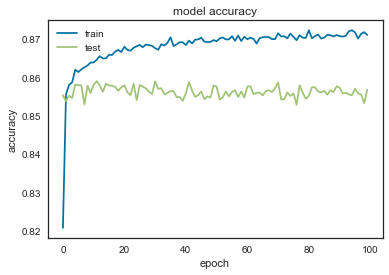

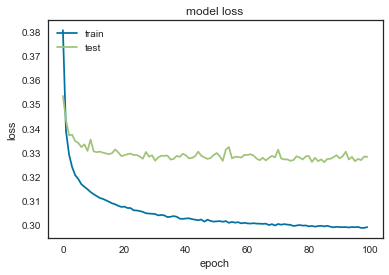

In [78]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 400,validation_split=0.3)

Train on 27645 samples, validate on 11849 samples
Epoch 1/400
27645/27645 [==============================] - 4s 158us/step - loss: 0.3869 - accuracy: 0.8175 - val_loss: 0.3571 - val_accuracy: 0.8504
Epoch 2/400
27645/27645 [==============================] - 4s 141us/step - loss: 0.3409 - accuracy: 0.8539 - val_loss: 0.3447 - val_accuracy: 0.8564
Epoch 3/400
27645/27645 [==============================] - 4s 143us/step - loss: 0.3311 - accuracy: 0.8573 - val_loss: 0.3395 - val_accuracy: 0.8559
Epoch 4/400
27645/27645 [==============================] - 4s 140us/step - loss: 0.3252 - accuracy: 0.8590 - val_loss: 0.3357 - val_accuracy: 0.8570
Epoch 5/400
27645/27645 [==============================] - 4s 148us/step - loss: 0.3208 - accuracy: 0.8611 - val_loss: 0.3338 - val_accuracy: 0.8574
Epoch 6/400
27645/27645 [==============================] - 4s 141us/step - loss: 0.3179 - accuracy: 0.8638 - val_loss: 0.3317 - val_accuracy: 0.8582
Epoch 7/400
27645/27645 [==============================]

27645/27645 [==============================] - 5s 183us/step - loss: 0.2971 - accuracy: 0.8697 - val_loss: 0.3286 - val_accuracy: 0.8596
Epoch 110/400
27645/27645 [==============================] - 5s 170us/step - loss: 0.2971 - accuracy: 0.8685 - val_loss: 0.3278 - val_accuracy: 0.8575
Epoch 111/400
27645/27645 [==============================] - 4s 162us/step - loss: 0.2970 - accuracy: 0.8697 - val_loss: 0.3276 - val_accuracy: 0.8612
Epoch 112/400
27645/27645 [==============================] - 6s 230us/step - loss: 0.2969 - accuracy: 0.8706 - val_loss: 0.3283 - val_accuracy: 0.8603
Epoch 113/400
27645/27645 [==============================] - 6s 216us/step - loss: 0.2966 - accuracy: 0.8711 - val_loss: 0.3299 - val_accuracy: 0.8626
Epoch 114/400
27645/27645 [==============================] - 5s 175us/step - loss: 0.2970 - accuracy: 0.8709 - val_loss: 0.3301 - val_accuracy: 0.8604
Epoch 115/400
27645/27645 [==============================] - 4s 158us/step - loss: 0.2967 - accuracy: 0.8707

27645/27645 [==============================] - 4s 156us/step - loss: 0.2947 - accuracy: 0.8723 - val_loss: 0.3287 - val_accuracy: 0.8597
Epoch 218/400
27645/27645 [==============================] - 4s 152us/step - loss: 0.2946 - accuracy: 0.8702 - val_loss: 0.3291 - val_accuracy: 0.8595
Epoch 219/400
27645/27645 [==============================] - 4s 155us/step - loss: 0.2950 - accuracy: 0.8702 - val_loss: 0.3295 - val_accuracy: 0.8600
Epoch 220/400
27645/27645 [==============================] - 4s 148us/step - loss: 0.2949 - accuracy: 0.8712 - val_loss: 0.3290 - val_accuracy: 0.8575
Epoch 221/400
27645/27645 [==============================] - 5s 165us/step - loss: 0.2951 - accuracy: 0.8713 - val_loss: 0.3307 - val_accuracy: 0.8603
Epoch 222/400
27645/27645 [==============================] - 8s 301us/step - loss: 0.2949 - accuracy: 0.8706 - val_loss: 0.3304 - val_accuracy: 0.8611
Epoch 223/400
27645/27645 [==============================] - 5s 167us/step - loss: 0.2948 - accuracy: 0.8722

27645/27645 [==============================] - 5s 167us/step - loss: 0.2936 - accuracy: 0.8724 - val_loss: 0.3309 - val_accuracy: 0.8558
Epoch 326/400
27645/27645 [==============================] - 4s 150us/step - loss: 0.2939 - accuracy: 0.8721 - val_loss: 0.3307 - val_accuracy: 0.8564
Epoch 327/400
27645/27645 [==============================] - 4s 149us/step - loss: 0.2937 - accuracy: 0.8711 - val_loss: 0.3318 - val_accuracy: 0.8577
Epoch 328/400
27645/27645 [==============================] - 4s 160us/step - loss: 0.2939 - accuracy: 0.8711 - val_loss: 0.3317 - val_accuracy: 0.8580
Epoch 329/400
27645/27645 [==============================] - 4s 147us/step - loss: 0.2936 - accuracy: 0.8710 - val_loss: 0.3345 - val_accuracy: 0.8578
Epoch 330/400
27645/27645 [==============================] - 4s 158us/step - loss: 0.2940 - accuracy: 0.8712 - val_loss: 0.3321 - val_accuracy: 0.8580
Epoch 331/400
27645/27645 [==============================] - 4s 150us/step - loss: 0.2937 - accuracy: 0.8727

In [80]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X1_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred)
accu=accuracy_score(y1_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[12353   805]
 [ 1618  2150]] 

The accuracy is 0.8568474536216472


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


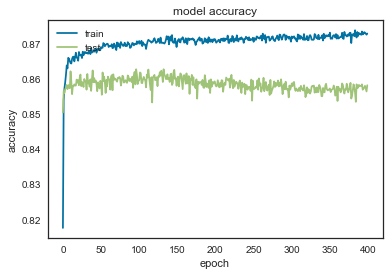

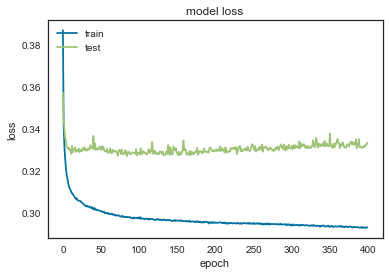

In [81]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
#Experiment 2 (For different layers)
#no of layers=3

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 100,validation_split=0.3)


Train on 27645 samples, validate on 11849 samples
Epoch 1/100
27645/27645 [==============================] - 11s 401us/step - loss: 0.3892 - accuracy: 0.8152 - val_loss: 0.3609 - val_accuracy: 0.8485
Epoch 2/100
27645/27645 [==============================] - 10s 355us/step - loss: 0.3415 - accuracy: 0.8524 - val_loss: 0.3452 - val_accuracy: 0.8553
Epoch 3/100
27645/27645 [==============================] - 10s 362us/step - loss: 0.3314 - accuracy: 0.8572 - val_loss: 0.3419 - val_accuracy: 0.8541
Epoch 4/100
27645/27645 [==============================] - 10s 364us/step - loss: 0.3252 - accuracy: 0.8589 - val_loss: 0.3374 - val_accuracy: 0.8574
Epoch 5/100
27645/27645 [==============================] - 10s 352us/step - loss: 0.3207 - accuracy: 0.8612 - val_loss: 0.3332 - val_accuracy: 0.8552
Epoch 6/100
27645/27645 [==============================] - 10s 371us/step - loss: 0.3185 - accuracy: 0.8621 - val_loss: 0.3331 - val_accuracy: 0.8565
Epoch 7/100
27645/27645 [=========================

Epoch 55/100
27645/27645 [==============================] - 11s 399us/step - loss: 0.3017 - accuracy: 0.8697 - val_loss: 0.3289 - val_accuracy: 0.8571
Epoch 56/100
27645/27645 [==============================] - 11s 388us/step - loss: 0.3016 - accuracy: 0.8695 - val_loss: 0.3297 - val_accuracy: 0.8574
Epoch 57/100
27645/27645 [==============================] - 11s 393us/step - loss: 0.3015 - accuracy: 0.8701 - val_loss: 0.3314 - val_accuracy: 0.8586
Epoch 58/100
27645/27645 [==============================] - 11s 387us/step - loss: 0.3016 - accuracy: 0.8700 - val_loss: 0.3305 - val_accuracy: 0.8574
Epoch 59/100
27645/27645 [==============================] - 11s 384us/step - loss: 0.3016 - accuracy: 0.8691 - val_loss: 0.3301 - val_accuracy: 0.8570
Epoch 60/100
27645/27645 [==============================] - 11s 380us/step - loss: 0.3015 - accuracy: 0.8689 - val_loss: 0.3297 - val_accuracy: 0.8578
Epoch 61/100
27645/27645 [==============================] - 11s 381us/step - loss: 0.3012 - ac

In [31]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X1_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred)
accu=accuracy_score(y1_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[12349   809]
 [ 1603  2165]] 

The accuracy is 0.8574973413683091


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


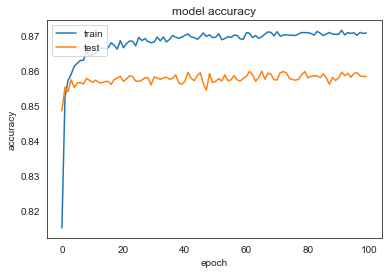

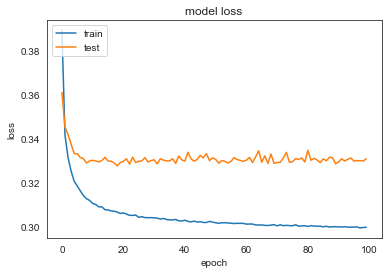

In [32]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
# Initialising the ANN
#no of layers=4
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 100,validation_split=0.3)


Train on 27645 samples, validate on 11849 samples
Epoch 1/100
27645/27645 [==============================] - 13s 458us/step - loss: 0.3805 - accuracy: 0.8262 - val_loss: 0.3514 - val_accuracy: 0.8548
Epoch 2/100
27645/27645 [==============================] - 11s 384us/step - loss: 0.3371 - accuracy: 0.8550 - val_loss: 0.3431 - val_accuracy: 0.8568
Epoch 3/100
27645/27645 [==============================] - 10s 373us/step - loss: 0.3272 - accuracy: 0.8595 - val_loss: 0.3333 - val_accuracy: 0.8569
Epoch 4/100
27645/27645 [==============================] - 10s 369us/step - loss: 0.3213 - accuracy: 0.8600 - val_loss: 0.3335 - val_accuracy: 0.8556
Epoch 5/100
27645/27645 [==============================] - 11s 388us/step - loss: 0.3167 - accuracy: 0.8629 - val_loss: 0.3308 - val_accuracy: 0.8561
Epoch 6/100
27645/27645 [==============================] - 10s 366us/step - loss: 0.3152 - accuracy: 0.8623 - val_loss: 0.3286 - val_accuracy: 0.8580
Epoch 7/100
27645/27645 [=========================

Epoch 55/100
27645/27645 [==============================] - 10s 366us/step - loss: 0.2983 - accuracy: 0.8695 - val_loss: 0.3282 - val_accuracy: 0.8582
Epoch 56/100
27645/27645 [==============================] - 11s 387us/step - loss: 0.2990 - accuracy: 0.8692 - val_loss: 0.3284 - val_accuracy: 0.8577
Epoch 57/100
27645/27645 [==============================] - 11s 381us/step - loss: 0.2985 - accuracy: 0.8695 - val_loss: 0.3289 - val_accuracy: 0.8575
Epoch 58/100
27645/27645 [==============================] - 10s 375us/step - loss: 0.2984 - accuracy: 0.8687 - val_loss: 0.3286 - val_accuracy: 0.8586
Epoch 59/100
27645/27645 [==============================] - 11s 384us/step - loss: 0.2984 - accuracy: 0.8701 - val_loss: 0.3304 - val_accuracy: 0.8584
Epoch 60/100
27645/27645 [==============================] - 10s 376us/step - loss: 0.2989 - accuracy: 0.8690 - val_loss: 0.3307 - val_accuracy: 0.8586
Epoch 61/100
27645/27645 [==============================] - 11s 384us/step - loss: 0.2985 - ac

In [35]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X1_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred)
accu=accuracy_score(y1_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[12320   838]
 [ 1571  2197]] 

The accuracy is 0.8576745834810351


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


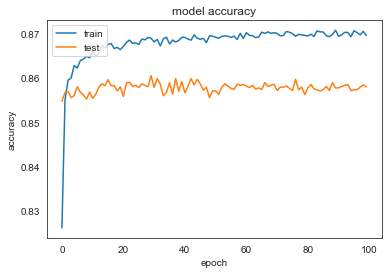

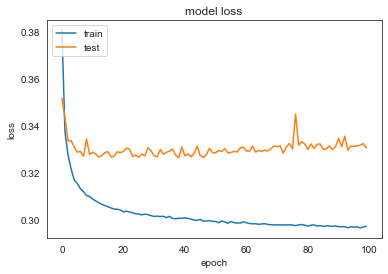

In [36]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# Initialising the ANN
#number of layers=5
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 100,validation_split=0.3)


Train on 27645 samples, validate on 11849 samples
Epoch 1/100
27645/27645 [==============================] - 13s 456us/step - loss: 0.3942 - accuracy: 0.8150 - val_loss: 0.3554 - val_accuracy: 0.8467
Epoch 2/100
27645/27645 [==============================] - 10s 378us/step - loss: 0.3416 - accuracy: 0.8521 - val_loss: 0.3450 - val_accuracy: 0.8510
Epoch 3/100
27645/27645 [==============================] - 10s 371us/step - loss: 0.3317 - accuracy: 0.8564 - val_loss: 0.3496 - val_accuracy: 0.8442
Epoch 4/100
27645/27645 [==============================] - 11s 399us/step - loss: 0.3262 - accuracy: 0.8598 - val_loss: 0.3414 - val_accuracy: 0.8526
Epoch 5/100
27645/27645 [==============================] - 10s 379us/step - loss: 0.3227 - accuracy: 0.8606 - val_loss: 0.3363 - val_accuracy: 0.8515
Epoch 6/100
27645/27645 [==============================] - 12s 418us/step - loss: 0.3204 - accuracy: 0.8610 - val_loss: 0.3354 - val_accuracy: 0.8537
Epoch 7/100
27645/27645 [=========================

27645/27645 [==============================] - 11s 413us/step - loss: 0.3031 - accuracy: 0.8693 - val_loss: 0.3286 - val_accuracy: 0.8570
Epoch 56/100
27645/27645 [==============================] - 11s 413us/step - loss: 0.3028 - accuracy: 0.8688 - val_loss: 0.3306 - val_accuracy: 0.8559
Epoch 57/100
27645/27645 [==============================] - 11s 414us/step - loss: 0.3029 - accuracy: 0.8694 - val_loss: 0.3281 - val_accuracy: 0.8584
Epoch 58/100
27645/27645 [==============================] - 11s 415us/step - loss: 0.3033 - accuracy: 0.8699 - val_loss: 0.3301 - val_accuracy: 0.8555
Epoch 59/100
27645/27645 [==============================] - 11s 405us/step - loss: 0.3024 - accuracy: 0.8702 - val_loss: 0.3317 - val_accuracy: 0.8574
Epoch 60/100
27645/27645 [==============================] - 12s 416us/step - loss: 0.3025 - accuracy: 0.8702 - val_loss: 0.3308 - val_accuracy: 0.8570
Epoch 61/100
27645/27645 [==============================] - 12s 442us/step - loss: 0.3023 - accuracy: 0.869

In [38]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X1_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred)
accu=accuracy_score(y1_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[12375   783]
 [ 1625  2143]] 

The accuracy is 0.8577336641852771


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


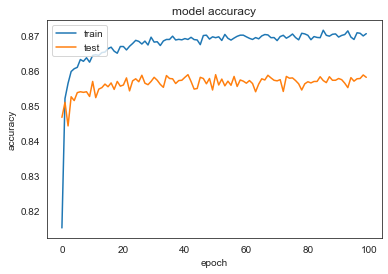

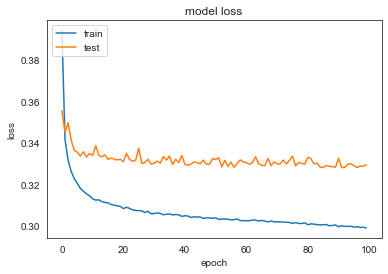

In [39]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
# Initialising the ANN
# no of layers=10
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=89, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the sixth hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
# Adding the seventh hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
# Adding the eighth hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
# Adding the ninth hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
# Adding the tenth hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 100,validation_split=0.3)


Train on 27645 samples, validate on 11849 samples
Epoch 1/100
27645/27645 [==============================] - 7s 253us/step - loss: 0.3896 - accuracy: 0.8201 - val_loss: 0.3572 - val_accuracy: 0.8522
Epoch 2/100
27645/27645 [==============================] - 6s 206us/step - loss: 0.3370 - accuracy: 0.8568 - val_loss: 0.3391 - val_accuracy: 0.8587
Epoch 3/100
27645/27645 [==============================] - 6s 216us/step - loss: 0.3245 - accuracy: 0.8610 - val_loss: 0.3341 - val_accuracy: 0.8605
Epoch 4/100
27645/27645 [==============================] - 7s 241us/step - loss: 0.3175 - accuracy: 0.8631 - val_loss: 0.3307 - val_accuracy: 0.8601
Epoch 5/100
27645/27645 [==============================] - 7s 238us/step - loss: 0.3119 - accuracy: 0.8659 - val_loss: 0.3311 - val_accuracy: 0.8593
Epoch 6/100
27645/27645 [==============================] - 6s 204us/step - loss: 0.3081 - accuracy: 0.8670 - val_loss: 0.3293 - val_accuracy: 0.8626
Epoch 7/100
27645/27645 [==============================]

In [28]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X1_test)
#y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred)
accu=accuracy_score(y1_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[12181   977]
 [ 1477  2291]] 

The accuracy is 0.8550159517901453


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


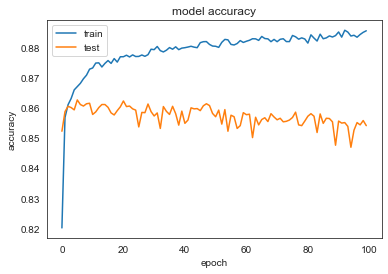

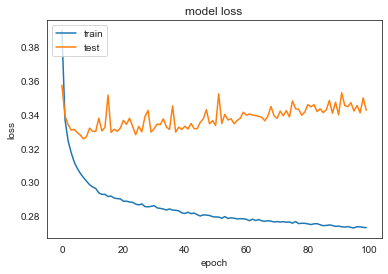

In [29]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Experiment 3

#### Changing the activation function

In [30]:
# Initialising the ANN
#sigmoid
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="sigmoid", input_dim=89, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="sigmoid", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="sigmoid", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="sigmoid", units=6, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="sigmoid", units=6, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 100,validation_split=0.3)


Train on 27645 samples, validate on 11849 samples
Epoch 1/100
27645/27645 [==============================] - 5s 175us/step - loss: 0.5267 - accuracy: 0.7815 - val_loss: 0.5115 - val_accuracy: 0.7790
Epoch 2/100
27645/27645 [==============================] - 4s 152us/step - loss: 0.4533 - accuracy: 0.7815 - val_loss: 0.4067 - val_accuracy: 0.7790
Epoch 3/100
27645/27645 [==============================] - 4s 149us/step - loss: 0.3866 - accuracy: 0.7824 - val_loss: 0.3892 - val_accuracy: 0.8450
Epoch 4/100
27645/27645 [==============================] - 4s 153us/step - loss: 0.3776 - accuracy: 0.8285 - val_loss: 0.3865 - val_accuracy: 0.8210
Epoch 5/100
27645/27645 [==============================] - 4s 152us/step - loss: 0.3734 - accuracy: 0.8248 - val_loss: 0.3817 - val_accuracy: 0.8281
Epoch 6/100
27645/27645 [==============================] - 4s 151us/step - loss: 0.3685 - accuracy: 0.8300 - val_loss: 0.3757 - val_accuracy: 0.8370
Epoch 7/100
27645/27645 [==============================]

In [31]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X1_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred)
accu=accuracy_score(y1_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[11888  1270]
 [ 1436  2332]] 

The accuracy is 0.8401276143211627


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


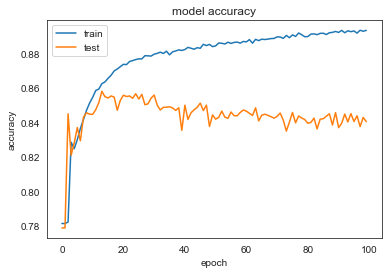

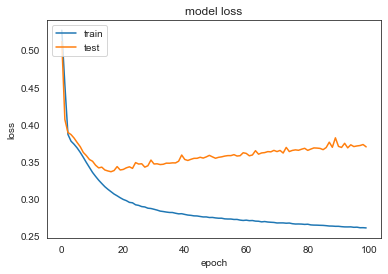

In [32]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# Initialising the ANN
#softmax
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="softmax", input_dim=89, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="softmax", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="softmax", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="softmax", units=6, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="softmax", units=6, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 100,validation_split=0.3)


Train on 27645 samples, validate on 11849 samples
Epoch 1/100
27645/27645 [==============================] - 8s 278us/step - loss: 0.5413 - accuracy: 0.7800 - val_loss: 0.5283 - val_accuracy: 0.7790
Epoch 2/100
27645/27645 [==============================] - 8s 286us/step - loss: 0.5251 - accuracy: 0.7815 - val_loss: 0.5283 - val_accuracy: 0.7790
Epoch 3/100
27645/27645 [==============================] - 7s 251us/step - loss: 0.4672 - accuracy: 0.7815 - val_loss: 0.4041 - val_accuracy: 0.7790
Epoch 4/100
27645/27645 [==============================] - 7s 238us/step - loss: 0.3904 - accuracy: 0.7993 - val_loss: 0.3912 - val_accuracy: 0.8063
Epoch 5/100
27645/27645 [==============================] - 6s 231us/step - loss: 0.3762 - accuracy: 0.8183 - val_loss: 0.3798 - val_accuracy: 0.8273
Epoch 6/100
27645/27645 [==============================] - 6s 219us/step - loss: 0.3617 - accuracy: 0.8348 - val_loss: 0.3689 - val_accuracy: 0.8332
Epoch 7/100
27645/27645 [==============================]

In [37]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X1_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred)
accu=accuracy_score(y1_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[12358   800]
 [ 1950  1818]] 

The accuracy is 0.8375280633345149


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


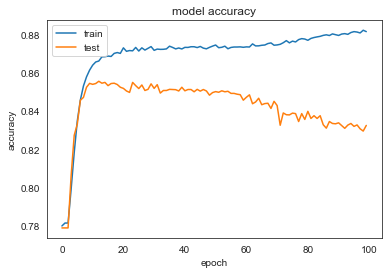

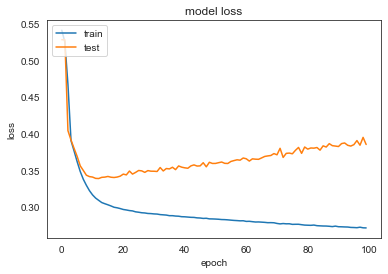

In [38]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# Initialising the ANN
#tanh
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=89, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 100,validation_split=0.3)


Train on 27645 samples, validate on 11849 samples
Epoch 1/100
27645/27645 [==============================] - 6s 234us/step - loss: 0.3737 - accuracy: 0.8447 - val_loss: 0.3498 - val_accuracy: 0.8514
Epoch 2/100
27645/27645 [==============================] - 5s 172us/step - loss: 0.3428 - accuracy: 0.8518 - val_loss: 0.3423 - val_accuracy: 0.8568
Epoch 3/100
27645/27645 [==============================] - 5s 166us/step - loss: 0.3345 - accuracy: 0.8554 - val_loss: 0.3425 - val_accuracy: 0.8503
Epoch 4/100
27645/27645 [==============================] - 5s 175us/step - loss: 0.3275 - accuracy: 0.8597 - val_loss: 0.3395 - val_accuracy: 0.8508
Epoch 5/100
27645/27645 [==============================] - 5s 190us/step - loss: 0.3224 - accuracy: 0.8600 - val_loss: 0.3327 - val_accuracy: 0.8573
Epoch 6/100
27645/27645 [==============================] - 6s 208us/step - loss: 0.3174 - accuracy: 0.8633 - val_loss: 0.3364 - val_accuracy: 0.8540
Epoch 7/100
27645/27645 [==============================]

In [40]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X1_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred)
accu=accuracy_score(y1_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[12008  1150]
 [ 1488  2280]] 

The accuracy is 0.8441451022096184


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


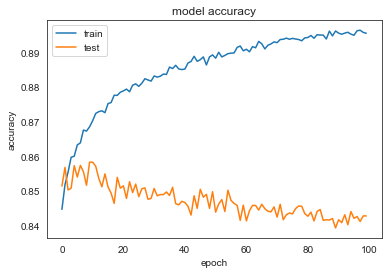

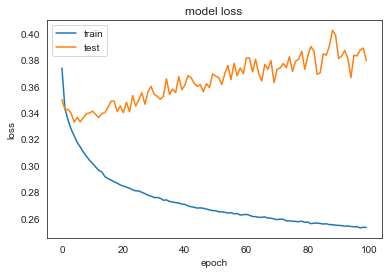

In [41]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
#changing the number of nodes:
#changing the number of nodes to 16.

# Initialising the ANN
#number of layers=5
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=89, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=16, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train, y1_train, batch_size = 10, epochs = 100,validation_split=0.3)



Train on 27645 samples, validate on 11849 samples
Epoch 1/100
27645/27645 [==============================] - 13s 471us/step - loss: 0.3747 - accuracy: 0.8299 - val_loss: 0.3547 - val_accuracy: 0.8517
Epoch 2/100
27645/27645 [==============================] - 11s 398us/step - loss: 0.3367 - accuracy: 0.8549 - val_loss: 0.3394 - val_accuracy: 0.8578
Epoch 3/100
27645/27645 [==============================] - 11s 391us/step - loss: 0.3269 - accuracy: 0.8579 - val_loss: 0.3350 - val_accuracy: 0.8560
Epoch 4/100
27645/27645 [==============================] - 11s 399us/step - loss: 0.3221 - accuracy: 0.8601 - val_loss: 0.3369 - val_accuracy: 0.8549
Epoch 5/100
27645/27645 [==============================] - 11s 398us/step - loss: 0.3184 - accuracy: 0.8625 - val_loss: 0.3339 - val_accuracy: 0.8563
Epoch 6/100
27645/27645 [==============================] - 11s 399us/step - loss: 0.3170 - accuracy: 0.8626 - val_loss: 0.3341 - val_accuracy: 0.8557
Epoch 7/100
27645/27645 [=========================

Epoch 55/100
27645/27645 [==============================] - 12s 445us/step - loss: 0.2983 - accuracy: 0.8711 - val_loss: 0.3337 - val_accuracy: 0.8575
Epoch 56/100
27645/27645 [==============================] - 14s 490us/step - loss: 0.2986 - accuracy: 0.8716 - val_loss: 0.3345 - val_accuracy: 0.8566
Epoch 57/100
27645/27645 [==============================] - 11s 403us/step - loss: 0.2993 - accuracy: 0.8731 - val_loss: 0.3362 - val_accuracy: 0.8542
Epoch 58/100
27645/27645 [==============================] - 11s 404us/step - loss: 0.2989 - accuracy: 0.8710 - val_loss: 0.3399 - val_accuracy: 0.8564
Epoch 59/100
27645/27645 [==============================] - 11s 395us/step - loss: 0.2988 - accuracy: 0.8718 - val_loss: 0.3355 - val_accuracy: 0.8564
Epoch 60/100
27645/27645 [==============================] - 11s 411us/step - loss: 0.2984 - accuracy: 0.8717 - val_loss: 0.3390 - val_accuracy: 0.8551
Epoch 61/100
27645/27645 [==============================] - 11s 405us/step - loss: 0.2982 - ac

In [43]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X1_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred)
accu=accuracy_score(y1_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[12248   910]
 [ 1580  2188]] 

The accuracy is 0.8528890464374336


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


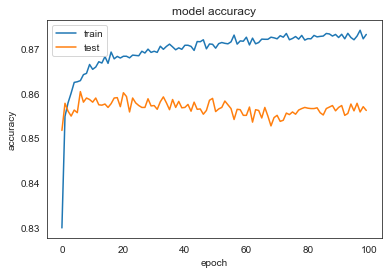

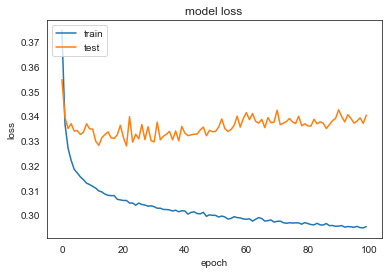

In [44]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### KNN FOR DATASET 2
##### Experiment 1 with k=5

In [45]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X1_train, y1_train)

# Predicting the Test set results
y_pred = classifier.predict(X1_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test, y_pred)

cm

array([[12387,   771],
       [ 2495,  1273]], dtype=int64)

In [47]:
report=classification_report(y1_test,y_pred)
accu_KNN_5=accuracy_score(y1_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X1_train, y = y1_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=5\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 5 folds
print("The mean of the accuracy scores with using K-cross validation with 5 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')

KNN with n=5


The Confusion Matrix
 [[12387   771]
 [ 2495  1273]]
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.94      0.88     13158
           1       0.62      0.34      0.44      3768

    accuracy                           0.81     16926
   macro avg       0.73      0.64      0.66     16926
weighted avg       0.79      0.81      0.78     16926

The Accuracy score with only 1 Training and Testing Data Set
 80.70424199456457
The mean of the accuracy scores with using K-cross validation with 5 folds
 81.12624659175984
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 0.32931535313504134


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

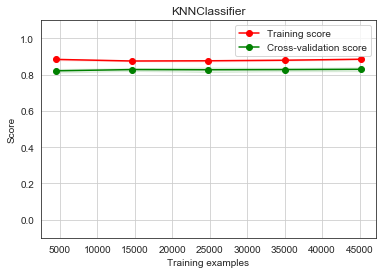

In [48]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x2, y2,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

#### Experiment 1 (Euclidean distance) with k=3

In [49]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X1_train, y1_train)

# Predicting the Test set results
y_pred = classifier.predict(X1_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test, y_pred)

cm

array([[12130,  1028],
       [ 2367,  1401]], dtype=int64)

In [50]:
report=classification_report(y1_test,y_pred)
accu_KNN_5=accuracy_score(y1_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X1_train, y = y1_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=3\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


KNN with n=3


The Confusion Matrix
 [[12130  1028]
 [ 2367  1401]]
The Classification report
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     13158
           1       0.58      0.37      0.45      3768

    accuracy                           0.80     16926
   macro avg       0.71      0.65      0.66     16926
weighted avg       0.78      0.80      0.78     16926

The Accuracy score with only 1 Training and Testing Data Set
 79.94210090984285
The mean of the accuracy scores with using K-cross validation with 10 folds
 80.32359795905197
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 0.3096509007224697


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

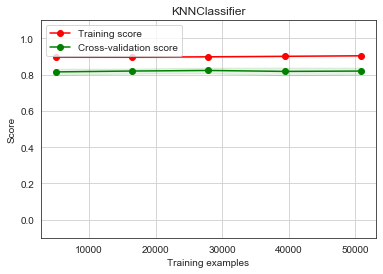

In [51]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x2, y2,cv=10,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

### Grid search for k with euclidean distance

In [27]:
#playing around with the KNN with n parameter to get the best n
#performing grid search to find the best value of n in KNN and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric = 'minkowski')
classifier.fit(X1_train, y1_train)

from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': range(2,40),'p':[2]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X1_train, y1_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.8197447713576745
{'n_neighbors': 15, 'p': 2}


Text(0, 0.5, 'Mean Error')

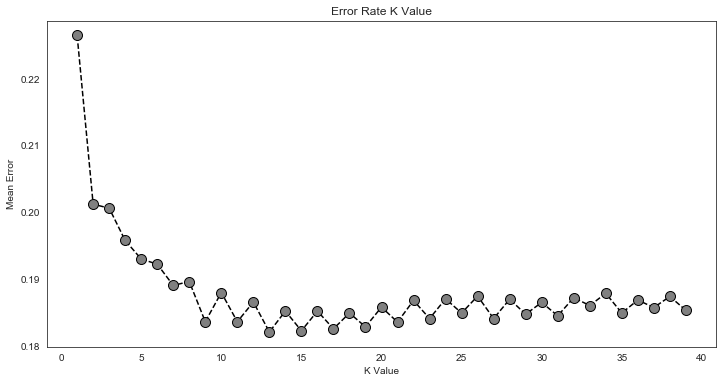

In [28]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
    knn.fit(X1_train, y1_train)
    pred_i = knn.predict(X1_test)
    error.append(np.mean(pred_i != y1_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

<h2>KNN with the Best values reported from Grid Serach for Euclidian Distance</h2>

In [29]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski', p = 2)
classifier.fit(X1_train, y1_train)

# Predicting the Test set results
y_pred = classifier.predict(X1_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test, y_pred)

cm

array([[12727,   431],
       [ 2650,  1118]], dtype=int64)

In [30]:
report=classification_report(y1_test,y_pred)
accu_KNN_5=accuracy_score(y1_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X1_train, y = y1_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=38\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 5 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 5 folds\n",std*100,end='\n')


KNN with n=38


The Confusion Matrix
 [[12727   431]
 [ 2650  1118]]
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.97      0.89     13158
           1       0.72      0.30      0.42      3768

    accuracy                           0.82     16926
   macro avg       0.77      0.63      0.66     16926
weighted avg       0.80      0.82      0.79     16926

The Accuracy score with only 1 Training and Testing Data Set
 81.79723502304147
The mean of the accuracy scores with using K-cross validation with 5 folds
 81.93648695510113
The Standard Deviation of the accuracy scores with using K-cross validation with 5 folds
 0.24364629718765196


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

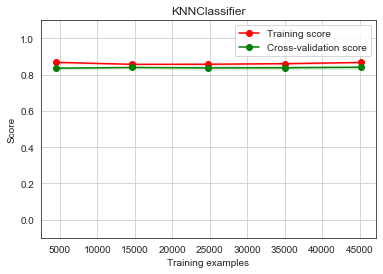

In [31]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x2, y2,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

#### knn with manhatten distance

In [32]:


# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
classifier.fit(X1_train, y1_train)

# Predicting the Test set results
y_pred = classifier.predict(X1_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test, y_pred)

cm

array([[12429,   729],
       [ 2238,  1530]], dtype=int64)

In [33]:
report=classification_report(y1_test,y_pred)
accu_KNN_5=accuracy_score(y1_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X1_train, y = y1_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=5\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 5 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 5 folds\n",std*100,end='\n')


KNN with n=5


The Confusion Matrix
 [[12429   729]
 [ 2238  1530]]
The Classification report
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     13158
           1       0.68      0.41      0.51      3768

    accuracy                           0.82     16926
   macro avg       0.76      0.68      0.70     16926
weighted avg       0.81      0.82      0.81     16926

The Accuracy score with only 1 Training and Testing Data Set
 82.47075505140022
The mean of the accuracy scores with using K-cross validation with 5 folds
 82.53405274766888
The Standard Deviation of the accuracy scores with using K-cross validation with 5 folds
 0.32791311893713526


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

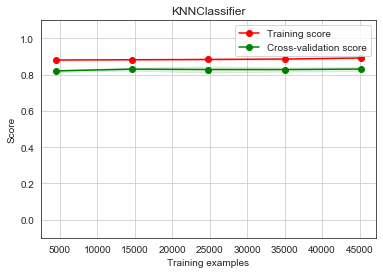

In [34]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x2, y2,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

In [35]:
#second experiment with k = 3(manhatten distance)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1)
classifier.fit(X1_train, y1_train)

# Predicting the Test set results
y_pred = classifier.predict(X1_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test, y_pred)

cm

array([[12187,   971],
       [ 2189,  1579]], dtype=int64)

In [36]:
report=classification_report(y1_test,y_pred)
accu_KNN_5=accuracy_score(y1_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X1_train, y = y1_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=3\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 5 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 5 folds\n",std*100,end='\n')


KNN with n=3


The Confusion Matrix
 [[12187   971]
 [ 2189  1579]]
The Classification report
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     13158
           1       0.62      0.42      0.50      3768

    accuracy                           0.81     16926
   macro avg       0.73      0.67      0.69     16926
weighted avg       0.80      0.81      0.80     16926

The Accuracy score with only 1 Training and Testing Data Set
 81.33049745952971
The mean of the accuracy scores with using K-cross validation with 10 folds
 81.71621103619829
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 0.1962607686515932


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

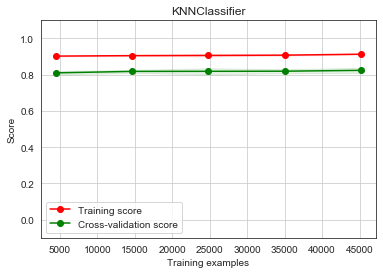

In [37]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x2, y2,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

### Grid search for k with manhatten distance

In [38]:
#playing around with the KNN with n parameter to get the best n
#performing grid search to find the best value of n in KNN and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric = 'minkowski')
classifier.fit(X1_train, y1_train)

from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': range(2,40),'p':[1]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X1_train, y1_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.8329872892084874
{'n_neighbors': 21, 'p': 1}


Text(0, 0.5, 'Mean Error')

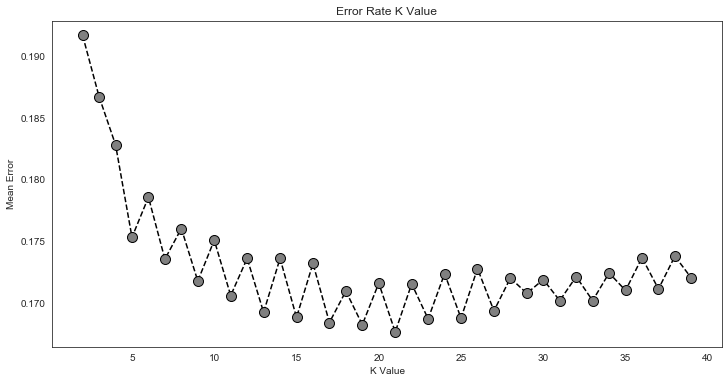

In [39]:
error = []

# Calculating error for K values between 1 and 40
for i in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=i,p=1,metric='minkowski')
    knn.fit(X1_train, y1_train)
    pred_i = knn.predict(X1_test)
    error.append(np.mean(pred_i != y1_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### knn with best value reported from grid search for manhatten distance

In [40]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 21, metric = 'minkowski', p = 1)
classifier.fit(X1_train, y1_train)

# Predicting the Test set results
y_pred = classifier.predict(X1_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test, y_pred)

cm

array([[12787,   371],
       [ 2466,  1302]], dtype=int64)

In [41]:
report=classification_report(y1_test,y_pred)
accu_KNN_5=accuracy_score(y1_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X1_train, y = y1_train, cv = 5)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=21\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 5 folds
print("The mean of the accuracy scores with using K-cross validation with 5 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 5 folds\n",std*100,end='\n')


KNN with n=21


The Confusion Matrix
 [[12787   371]
 [ 2466  1302]]
The Classification report
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     13158
           1       0.78      0.35      0.48      3768

    accuracy                           0.83     16926
   macro avg       0.81      0.66      0.69     16926
weighted avg       0.82      0.83      0.81     16926

The Accuracy score with only 1 Training and Testing Data Set
 83.23880420654615
The mean of the accuracy scores with using K-cross validation with 5 folds
 83.29871675997082
The Standard Deviation of the accuracy scores with using K-cross validation with 5 folds
 0.2617747349987254


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

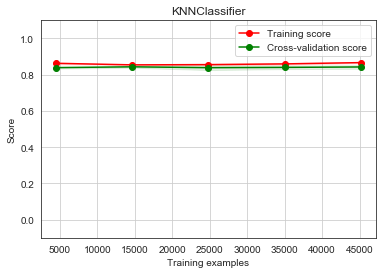

In [42]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x2, y2,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show